In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import io

## 1. Extracción

In [47]:
df_raw = pd.read_csv("/content/2025-07.csv")
print(f"Se cargaron {df_raw.shape[0]} registros.")

Se cargaron 1663896 registros.


In [48]:
# Mostrar el tamaño del DataFrame (filas y columnas)
print("Tamaño del DataFrame:")
print(df_raw.shape)

# Mostrar una previsualización de los datos
print("\nPrevisualización del DataFrame:")
display(df_raw.head(50))

Tamaño del DataFrame:
(1663896, 9)

Previsualización del DataFrame:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha_Arribo,Hora_Arribo
0,M,30.0,4998803,173,30/06/2025,23:33:59,348,01/07/2025,00:00:11
1,M,27.0,3976669,009,30/06/2025,23:41:24,086,01/07/2025,00:00:21
2,M,43.0,8223240,576,30/06/2025,23:48:16,296,01/07/2025,00:00:24
3,M,26.0,6050157,365,30/06/2025,23:52:12,329,01/07/2025,00:00:27
4,M,23.0,5124706,144,30/06/2025,23:54:55,575,01/07/2025,00:00:46
5,M,19.0,2053122,137,30/06/2025,23:33:00,343,01/07/2025,00:00:52
6,M,48.0,4574182,124,30/06/2025,23:46:14,576,01/07/2025,00:00:58
7,M,28.0,8244592,595,30/06/2025,23:47:40,618,01/07/2025,00:01:16
8,M,39.0,7042187,160,30/06/2025,23:17:37,255,01/07/2025,00:01:28
9,M,48.0,6648281,271-272,30/06/2025,23:49:30,545,01/07/2025,00:01:30


## 2. Transformación

In [49]:
df = df_raw.copy()

print("\nTipos de datos antes de la conversión a datetime:")
print(df[['Fecha_Retiro', 'Hora_Retiro', 'Fecha_Arribo', 'Hora_Arribo']].dtypes)

# Combine date and time columns and convert to datetime
df['Fecha_Hora_Retiro'] = pd.to_datetime(df['Fecha_Retiro'] + ' ' + df['Hora_Retiro'], format='%d/%m/%Y %H:%M:%S')
df['Fecha_Hora_Arribo'] = pd.to_datetime(df['Fecha_Arribo'] + ' ' + df['Hora_Arribo'], format='%d/%m/%Y %H:%M:%S')

# Drop the original date and time columns
df = df.drop(['Fecha_Retiro', 'Hora_Retiro', 'Fecha_Arribo', 'Hora_Arribo'], axis=1)

print("\nColumnas de fecha y hora convertidas a datetime.")

print("\nTipos de datos despues de la conversión a datetime:")
print(df[['Fecha_Hora_Retiro', 'Fecha_Hora_Arribo']].dtypes)

print("\nPrevisualización del DataFrame después de la conversión:")
display(df.head())


Tipos de datos antes de la conversión a datetime:
Fecha_Retiro    object
Hora_Retiro     object
Fecha_Arribo    object
Hora_Arribo     object
dtype: object

Columnas de fecha y hora convertidas a datetime.

Tipos de datos despues de la conversión a datetime:
Fecha_Hora_Retiro    datetime64[ns]
Fecha_Hora_Arribo    datetime64[ns]
dtype: object

Previsualización del DataFrame después de la conversión:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_EstacionArribo,Fecha_Hora_Retiro,Fecha_Hora_Arribo
0,M,30.0,4998803,173,348,2025-06-30 23:33:59,2025-07-01 00:00:11
1,M,27.0,3976669,009,086,2025-06-30 23:41:24,2025-07-01 00:00:21
2,M,43.0,8223240,576,296,2025-06-30 23:48:16,2025-07-01 00:00:24
3,M,26.0,6050157,365,329,2025-06-30 23:52:12,2025-07-01 00:00:27
4,M,23.0,5124706,144,575,2025-06-30 23:54:55,2025-07-01 00:00:46


In [50]:
df = df.rename(columns={'Ciclo_EstacionArribo': 'Ciclo_Estacion_Arribo'})
df = df.rename(columns={'Fecha_Hora_Retiro': 'Fecha_Retiro'})
df = df.rename(columns={'Fecha_Hora_Arribo': 'Fecha_Arribo'})

In [64]:
df['Duracion_Recorrido'] = df['Fecha_Arribo'] - df['Fecha_Retiro']
print("\nPrevisualización del DataFrame con la nueva columna 'Duracion_Recorrido':")
display(df.head())


Previsualización del DataFrame con la nueva columna 'Duracion_Recorrido':


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Retiro,Fecha_Arribo,Duracion_Recorrido
0,M,30.0,4998803,173,348,2025-06-30 23:33:59,2025-07-01 00:00:11,0 days 00:26:12
1,M,27.0,3976669,009,086,2025-06-30 23:41:24,2025-07-01 00:00:21,0 days 00:18:57
2,M,43.0,8223240,576,296,2025-06-30 23:48:16,2025-07-01 00:00:24,0 days 00:12:08
3,M,26.0,6050157,365,329,2025-06-30 23:52:12,2025-07-01 00:00:27,0 days 00:08:15
4,M,23.0,5124706,144,575,2025-06-30 23:54:55,2025-07-01 00:00:46,0 days 00:05:51


In [52]:
print(f"Valores nulos en 'nombre_estacion_origen': {df['Ciclo_Estacion_Retiro'].isnull().sum()}")
print(f"Valores nulos en 'nombre_estacion_destino': {df['Ciclo_Estacion_Arribo'].isnull().sum()}")
print(f"Valores nulos en 'duracion_recorrido': {df['Duracion_Recorrido'].isnull().sum()}")

Valores nulos en 'nombre_estacion_origen': 0
Valores nulos en 'nombre_estacion_destino': 0
Valores nulos en 'duracion_recorrido': 0


In [53]:
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())


Conteo de valores nulos por columna:
Genero_Usuario            3
Edad_Usuario             80
Bici                      0
Ciclo_Estacion_Retiro     0
Ciclo_Estacion_Arribo     0
Fecha_Retiro              0
Fecha_Arribo              0
Duracion_Recorrido        0
dtype: int64


In [59]:
df = df.dropna(subset=['Genero_Usuario'])
print("Rows with nulls in 'Genero_Usuario' dropped.")
print("\nConteo de valores nulos por columna despues de borrar los nulos en Genero_Usuario:")
print(df.isnull().sum())

Rows with nulls in 'Genero_Usuario' dropped.

Conteo de valores nulos por columna despues de borrar los nulos en Genero_Usuario:
Genero_Usuario            0
Edad_Usuario             77
Bici                      0
Ciclo_Estacion_Retiro     0
Ciclo_Estacion_Arribo     0
Fecha_Retiro              0
Fecha_Arribo              0
Duracion_Recorrido        0
dtype: int64



Visualización de la distribución de 'genero':

Conteo de viajes por género:
Genero_Usuario
M    1133620
F     459853
?      38636
O      31784
Name: count, dtype: int64


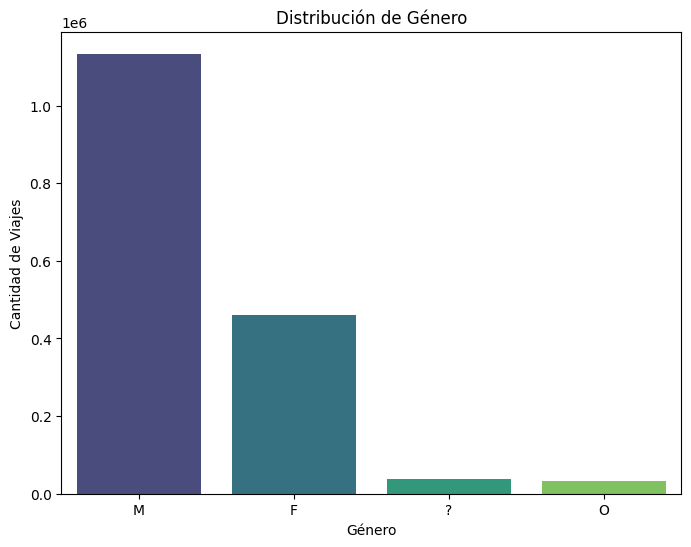

In [67]:
print("\nVisualización de la distribución de 'genero':")
print("\nConteo de viajes por género:")
print(df['Genero_Usuario'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Genero_Usuario', palette='viridis', hue='Genero_Usuario', legend=False)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Viajes')
plt.show()

In [69]:
df_encoded = pd.get_dummies(df, columns=['Genero_Usuario'], prefix=['Genero_Usuario'])

print("\nDataFrame después de One-Hot Encoding:")
display(df_encoded.head())


DataFrame después de One-Hot Encoding:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Retiro,Fecha_Arribo,Duracion_Recorrido,Genero_Usuario_?,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O
0,30.0,4998803,173,348,2025-06-30 23:33:59,2025-07-01 00:00:11,0 days 00:26:12,False,False,True,False
1,27.0,3976669,009,086,2025-06-30 23:41:24,2025-07-01 00:00:21,0 days 00:18:57,False,False,True,False
2,43.0,8223240,576,296,2025-06-30 23:48:16,2025-07-01 00:00:24,0 days 00:12:08,False,False,True,False
3,26.0,6050157,365,329,2025-06-30 23:52:12,2025-07-01 00:00:27,0 days 00:08:15,False,False,True,False
4,23.0,5124706,144,575,2025-06-30 23:54:55,2025-07-01 00:00:46,0 days 00:05:51,False,False,True,False


## Discretización

In [72]:
print("\nIniciando discretización de 'Duracion_Recorrido'...")

# Definir los rangos y las etiquetas
bins = [pd.Timedelta(seconds=0), pd.Timedelta(seconds=1200), pd.Timedelta(seconds=2400), pd.Timedelta(seconds=3600), df_encoded['Duracion_Recorrido'].max()]
labels = ['Viaje Corto', 'Viaje Mediano', 'Viaje Largo', 'Viaje Muy Largo (Anomalía)']

# Aplicar la discretización
df_encoded['Categoria_Duracion'] = pd.cut(df_encoded['Duracion_Recorrido'], bins=bins, labels=labels, right=False, include_lowest=True)

# Mostrar el conteo de valores en la nueva columna
print("\nConteo de viajes por categoría de duración:")
print(df_encoded['Categoria_Duracion'].value_counts())

# Mostrar las primeras filas con la nueva columna
print("\nPrevisualización del DataFrame con la nueva columna:")
display(df_encoded.head())


Iniciando discretización de 'Duracion_Recorrido'...

Conteo de viajes por categoría de duración:
Categoria_Duracion
Viaje Corto                   1261450
Viaje Mediano                  351238
Viaje Largo                     43510
Viaje Muy Largo (Anomalía)       7694
Name: count, dtype: int64

Previsualización del DataFrame con la nueva columna:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Retiro,Fecha_Arribo,Duracion_Recorrido,Genero_Usuario_?,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,Categoria_Duracion
0,30.0,4998803,173,348,2025-06-30 23:33:59,2025-07-01 00:00:11,0 days 00:26:12,False,False,True,False,Viaje Mediano
1,27.0,3976669,009,086,2025-06-30 23:41:24,2025-07-01 00:00:21,0 days 00:18:57,False,False,True,False,Viaje Corto
2,43.0,8223240,576,296,2025-06-30 23:48:16,2025-07-01 00:00:24,0 days 00:12:08,False,False,True,False,Viaje Corto
3,26.0,6050157,365,329,2025-06-30 23:52:12,2025-07-01 00:00:27,0 days 00:08:15,False,False,True,False,Viaje Corto
4,23.0,5124706,144,575,2025-06-30 23:54:55,2025-07-01 00:00:46,0 days 00:05:51,False,False,True,False,Viaje Corto


## Normalización (Min-Max Scaling)

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ["Duracion_Recorrido"]

df_encoded[columns_to_normalize] = scaler.fit_transform(df_encoded[columns_to_normalize])

print("\nColumnas numéricas normalizadas:")
display(df_encoded.head())


Columnas numéricas normalizadas:


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Retiro,Fecha_Arribo,Duracion_Recorrido,Genero_Usuario_?,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,Categoria_Duracion
0,30.0,4998803,173,348,2025-06-30 23:33:59,2025-07-01 00:00:11,0.000028,False,False,True,False,Viaje Mediano
1,27.0,3976669,009,086,2025-06-30 23:41:24,2025-07-01 00:00:21,0.000020,False,False,True,False,Viaje Corto
2,43.0,8223240,576,296,2025-06-30 23:48:16,2025-07-01 00:00:24,0.000013,False,False,True,False,Viaje Corto
3,26.0,6050157,365,329,2025-06-30 23:52:12,2025-07-01 00:00:27,0.000009,False,False,True,False,Viaje Corto
4,23.0,5124706,144,575,2025-06-30 23:54:55,2025-07-01 00:00:46,0.000006,False,False,True,False,Viaje Corto


## Feature Engineering

In [78]:
# 1. Duración del viaje en minutos
df_encoded['Duracion_Minutos'] = (df_encoded['Fecha_Arribo'] - df_encoded['Fecha_Retiro']).dt.total_seconds() / 60

# 2. Día de la semana (0=Lunes, 6=Domingo)
df_encoded['Dia_Semana'] = df_encoded['Fecha_Retiro'].dt.dayofweek

# 3. Hora del día
df_encoded['Hora_Inicio'] = df_encoded['Fecha_Retiro'].dt.hour

# 4. Categoría de día (Fin de semana vs. Entre semana)
df_encoded['Tipo_Dia'] = df_encoded['Dia_Semana'].apply(lambda x: 'Fin de Semana' if x >= 5 else 'Entre Semana')


In [79]:
print("Nuevas características creadas: 'Duracion_Minutos', 'Dia_Semana', 'Hora_Inicio', 'Tipo_Dia'.")
display(df_encoded.head())

Nuevas características creadas: 'Duracion_Minutos', 'Dia_Semana', 'Hora_Inicio', 'Tipo_Dia'.


,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Ciclo_Estacion_Arribo,Fecha_Retiro,Fecha_Arribo,Duracion_Recorrido,Genero_Usuario_?,Genero_Usuario_F,Genero_Usuario_M,Genero_Usuario_O,Categoria_Duracion,Duracion_Minutos,Dia_Semana,Hora_Inicio,Tipo_Dia
0,30.0,4998803,173,348,2025-06-30 23:33:59,2025-07-01 00:00:11,0.000028,False,False,True,False,Viaje Mediano,26.200000,0,23,Entre Semana
1,27.0,3976669,009,086,2025-06-30 23:41:24,2025-07-01 00:00:21,0.000020,False,False,True,False,Viaje Corto,18.950000,0,23,Entre Semana
2,43.0,8223240,576,296,2025-06-30 23:48:16,2025-07-01 00:00:24,0.000013,False,False,True,False,Viaje Corto,12.133333,0,23,Entre Semana
3,26.0,6050157,365,329,2025-06-30 23:52:12,2025-07-01 00:00:27,0.000009,False,False,True,False,Viaje Corto,8.250000,0,23,Entre Semana
4,23.0,5124706,144,575,2025-06-30 23:54:55,2025-07-01 00:00:46,0.000006,False,False,True,False,Viaje Corto,5.850000,0,23,Entre Semana


In [81]:
if not df_encoded.empty:
    # El paso final es cargar nuestros datos limpios y enriquecidos a un nuevo destino.
    # Opción 1: Guardar como un nuevo archivo CSV.
    try:
        df_encoded.to_csv("viajes_ecobici_limpios.csv", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'")
    except Exception as e:
        print(f"Error al guardar el archivo CSV: {e}")

    # Opción 2 (Recomendada para Big Data): Guardar en formato Parquet.
    # Parquet es un formato columnar optimizado para análisis, es más rápido y ocupa menos espacio.
    try:
        # Necesitarás instalar 'pyarrow' o 'fastparquet': pip install pyarrow
        df_encoded.to_parquet("viajes_ecobici_limpios.parquet", index=False)
        print("DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.parquet'")
    except ImportError:
        print("\nPara guardar en formato Parquet, necesitas instalar 'pyarrow'.")
        print("Ejecuta: pip install pyarrow")
    except Exception as e:
        print(f"Error al guardar el archivo Parquet: {e}")

DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.csv'
DataFrame transformado guardado exitosamente en 'viajes_ecobici_limpios.parquet'
